In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# loading the csv data to a Pandas DataFrame
spatial_data = pd.read_csv('Data/Spatial Analysis/combined_data.csv')

In [3]:
import glob
import pandas as pd

# Define the columns you want to keep
column_mapping = {
    "STATE/UT":"States/UTs",
    "YEAR":"Year",
    "RESIDENTIAL PREMISES - Dacoity" : "Residence_Dacoity_Cases reported",
    "RESIDENTIAL PREMISES - Robbery":"Residence_Robbery_Cases reported",
    "RESIDENTIAL PREMISES - Burglary":"Residence_Burglary_Cases reported",
    "RESIDENTIAL PREMISES - Theft":"Residence_Theft_Cases reported",
    "HIGHWAYS - Dacoity":"Highways_Dacoity_Cases reported",
    "HIGHWAYS - Robbery":"Highways_Robbery_Cases reported",
    "HIGHWAYS - Burglary":"Highways_Burglary_Cases reported",
    "HIGHWAYS - Theft":"Highways_Theft_Cases reported",
    "RIVER and SEA - Dacoity":"RiverOrSea_Dacoity_Cases reported",
    "RIVER and SEA - Robbery":"RiverOrSea_Robbery_Cases reported",
    "RIVER and SEA - Burglary":"RiverOrSea_Burglary_Cases reported",
    "RIVER and SEA - Theft":"RiverOrSea_Theft_Cases reported",
    "RAILWAYS - Dacoity":"Railways_Dacoity_Cases reported",
    "RAILWAYS - Robbery":"Railways_Robbery_Cases reported",
    "RAILWAYS - Burglary":"Railways_Burglary_Cases reported",
    "RAILWAYS - Theft":"Railways_Theft_Cases reported",
    "BANKS - Dacoity":"Bank_Dacoity_Cases reported",
    "BANKS - Robbery":"Bank_Robbery_Cases reported",
    "BANKS - Burglary":"Bank_Burglary_Cases reported",
    "BANKS - Theft":"Bank_Theft_Cases reported",
    "COMMERCIAL ESTABLISHMENTS - Dacoity":"CommEst_Dacoity_Cases reported",
    "COMMERCIAL ESTABLISHMENTS - Robbery":"CommEst_Robbery_Cases reported",
    "COMMERCIAL ESTABLISHMENTS - Burglary":"CommEst_Burglary_Cases reported",
    "COMMERCIAL ESTABLISHMENTS - Theft":"CommEst_Theft_Cases reported",
    "OTHER PLACES - Dacoity":"OtherPlaces_Dacoity_Cases reported",
    "OTHER PLACES - Robbery":"OtherPlaces_Robbery_Cases reported",
    "OTHER PLACES - Burglary":"OtherPlaces_Burglary_Cases reported",
    "OTHER PLACES - Theft":"OtherPlaces_Theft_Cases reported",
    "TOTAL - Dacoity":"Total_Dacoity_Cases reported",
    "TOTAL - Robbery":"Total_Robbery_Cases reported",
    "TOTAL - Burglary":"Total_Burglary_Cases reported",
    "TOTAL - Theft":"Total_Theft_Cases reported"
}

# Path to your CSV files (update this to the location of your files)
path = "Data/Spatial Analysis/17_Crime_by_place_of_occurrence_2014.csv"

combined_data = pd.DataFrame()

# Loop through each CSV file
for filename in glob.glob(path):
    # Read the CSV file
    data = pd.read_csv(filename)

    # Rename the columns according to the mapping
    data.rename(columns=column_mapping, inplace=True)

    # Select only the relevant columns
    filtered_data = data[list(column_mapping.values())]

    # Append the filtered data to the combined DataFrame
    combined_data = pd.concat([combined_data, filtered_data], ignore_index=True)

# Save the combined data to a new CSV file
combined_data.to_csv("combined_data.csv", index=False)


In [4]:
# Making new column for Total with adding all from column 5 to end
spatial_data['Total'] = spatial_data.iloc[:, 5:].sum(axis=1)
# Make the spatial datas column State/ut all capital
spatial_data['STATE/UT'] = spatial_data['STATE/UT'].str.title()
# Make the state/ut column all capital
spatial_data['STATE/UT'] = spatial_data['STATE/UT'].str.upper()

In [5]:
# find the unique values in the 'STATE/UT' column which start from the letter 'T'
unique_states = spatial_data['STATE/UT'].unique()

# filter the unique values that start with the letter 'T'
t_states = [state for state in unique_states if state.startswith('TO')]

# print the filtered unique values  
print(t_states)

# drop the rows where the 'STATE/UT' column starts with the letter 'T'
spatial_data = spatial_data[~spatial_data['STATE/UT'].isin(t_states)]
unique_states = spatial_data['STATE/UT'].unique()
# print(unique_states)

# drop TOTAL (STATES) row
spatial_data = spatial_data[spatial_data['STATE/UT'] != 'TOTAL (STATES)']
spatial_data = spatial_data[spatial_data['STATE/UT'] != 'TOTAL (UTs)']
spatial_data = spatial_data[spatial_data['STATE/UT'] != 'TOTAL (ALL)']
spatial_data = spatial_data[spatial_data['STATE/UT'] != 'TOTAL (ALL-INDIA)']
unique_states = spatial_data['STATE/UT'].unique()
print(unique_states)


['TOTAL (STATES)', 'TOTAL (UTS)', 'TOTAL (ALL-INDIA)', 'TOTAL (STATE)', 'TOTAL (ALL INDIA)']
['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'A&N ISLANDS' 'D&N HAVELI' 'DELHI UT' 'TELANGANA']


In [6]:
# Processing the data adding all the values in the Victims_Total column and grouping by year
year_wise = spatial_data.groupby('YEAR')['Total'].sum()
state_wise = spatial_data.groupby('STATE/UT')['Total'].sum().sort_values()
state_wise_other = state_wise.sort_values(ascending=False)
others = state_wise_other[state_wise_other/state_wise_other.sum() < 0.025].sum()
state_wise_other = state_wise_other[state_wise_other/state_wise_other.sum() >= 0.025]
state_wise_other['Others'] = others

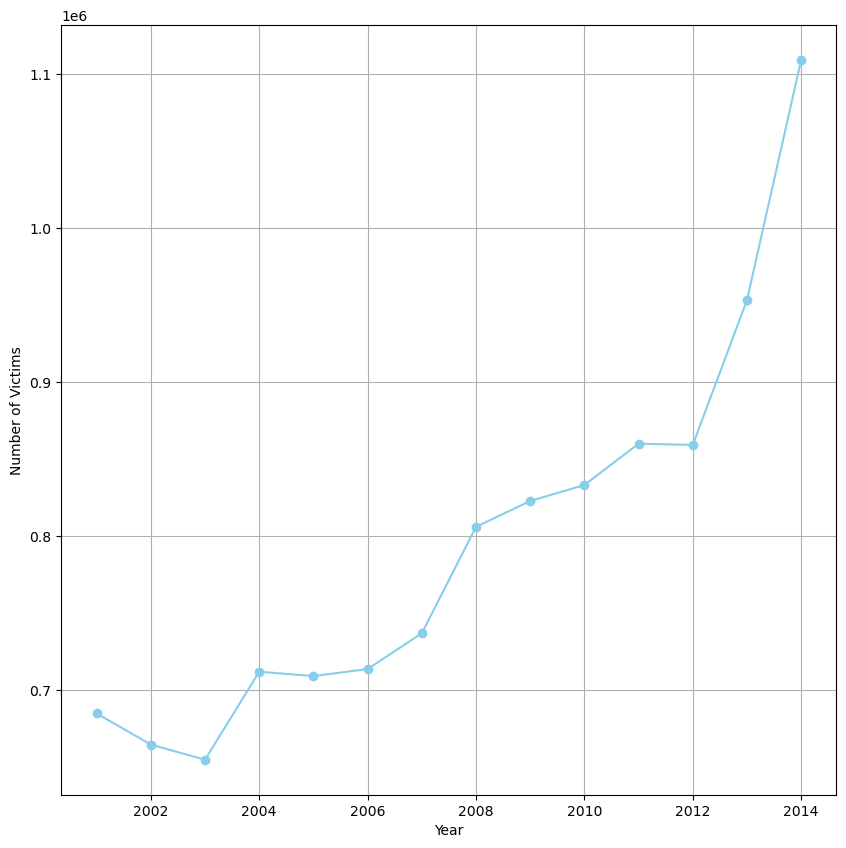

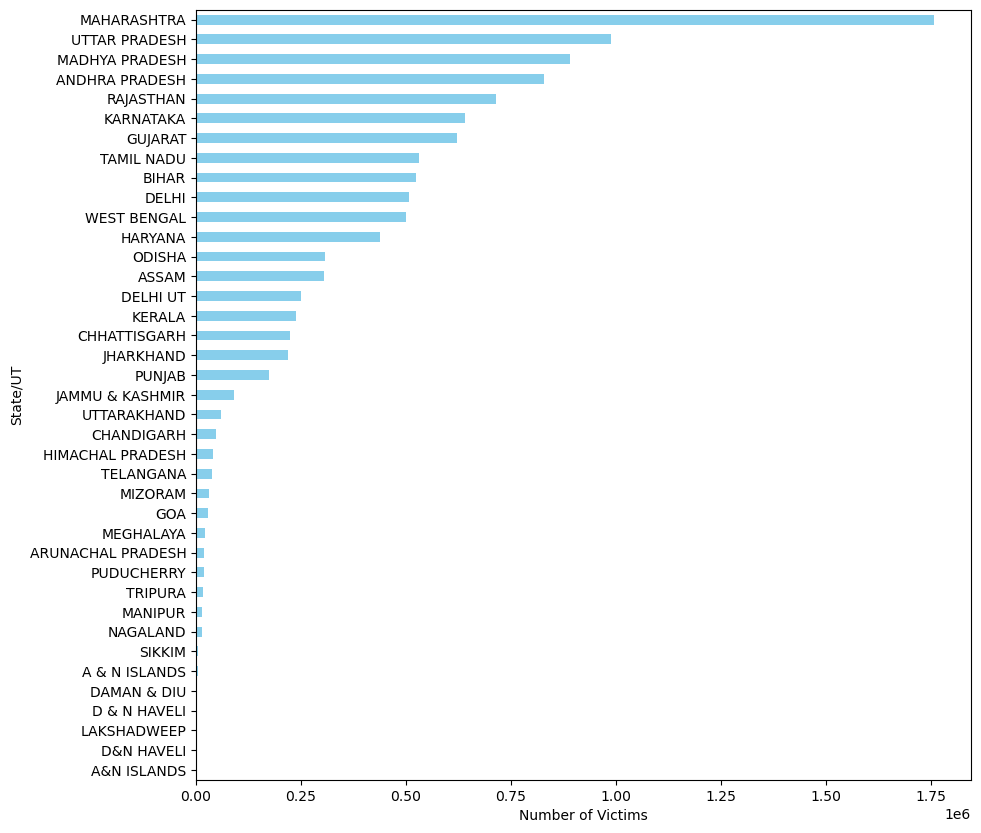

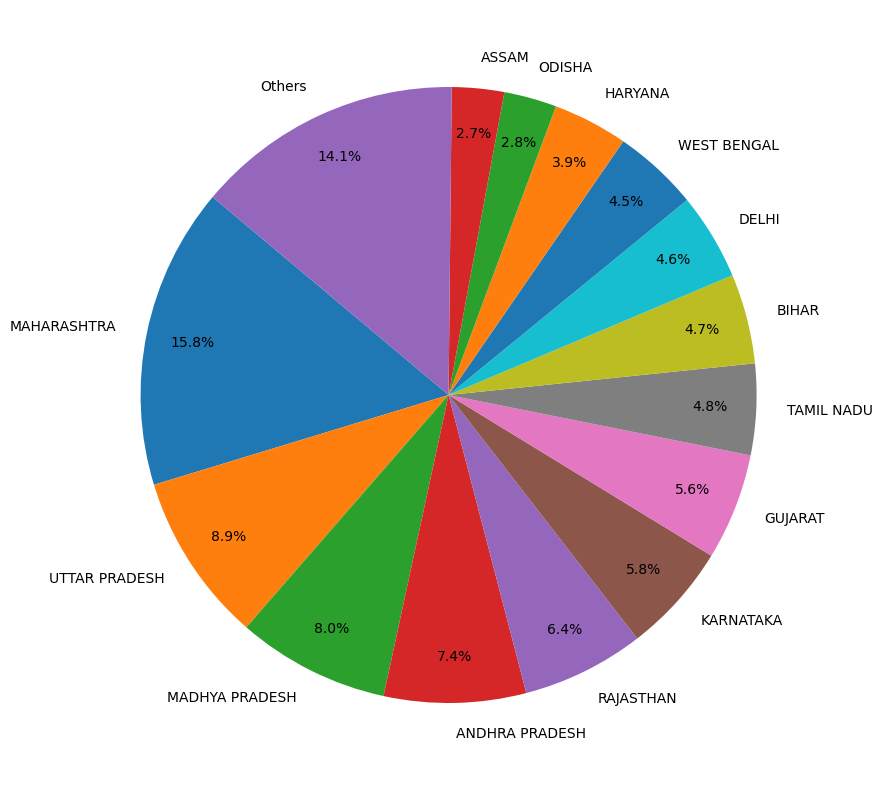

In [7]:
# plotting the data points in 2D
plt.figure(figsize=(10,10))
year_wise.plot(kind='line',marker='o',color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,10))
state_wise.plot(kind='barh',color='skyblue')
plt.xlabel('Number of Victims')
plt.ylabel('State/UT')
plt.show()

plt.figure(figsize=(10,10))
state_wise_other.plot(kind='pie',autopct='%1.1f%%',startangle=140,pctdistance=0.85)
plt.ylabel('')
plt.show()

In [8]:
# Making a new column 'Yearly_Total' by summing all columns for each year
yearly_totals = spatial_data.groupby('YEAR').sum(numeric_only=True)

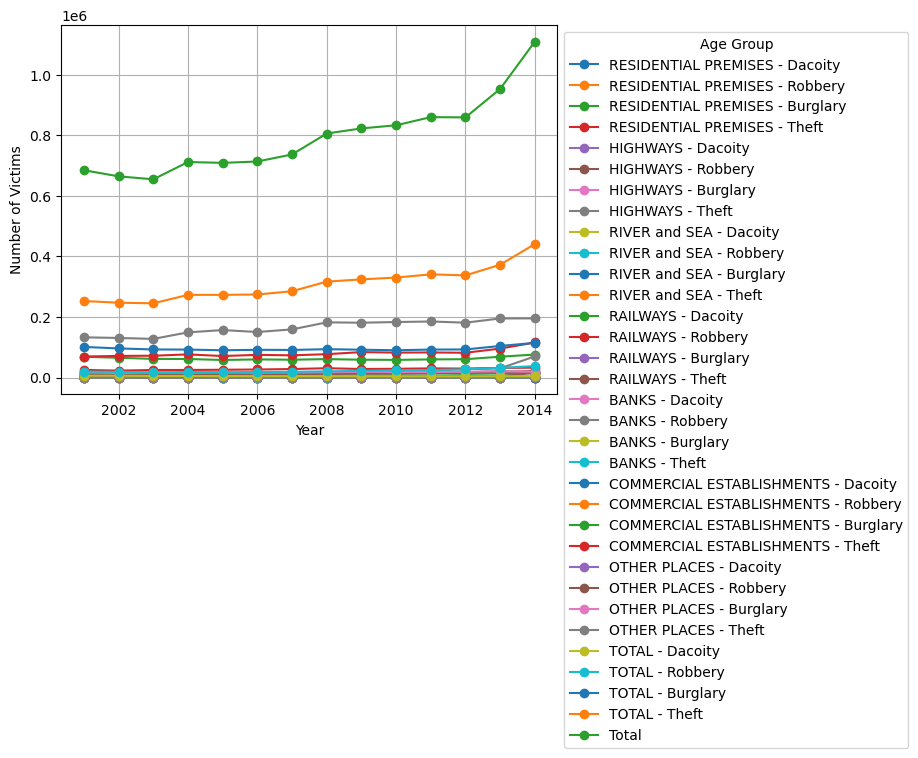

In [9]:
# print(yearly_totals.head())
yearly_totals.plot(kind='line',marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.grid(True)
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1, 1))
# plt.tight_layout()
plt.show()